a.set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.


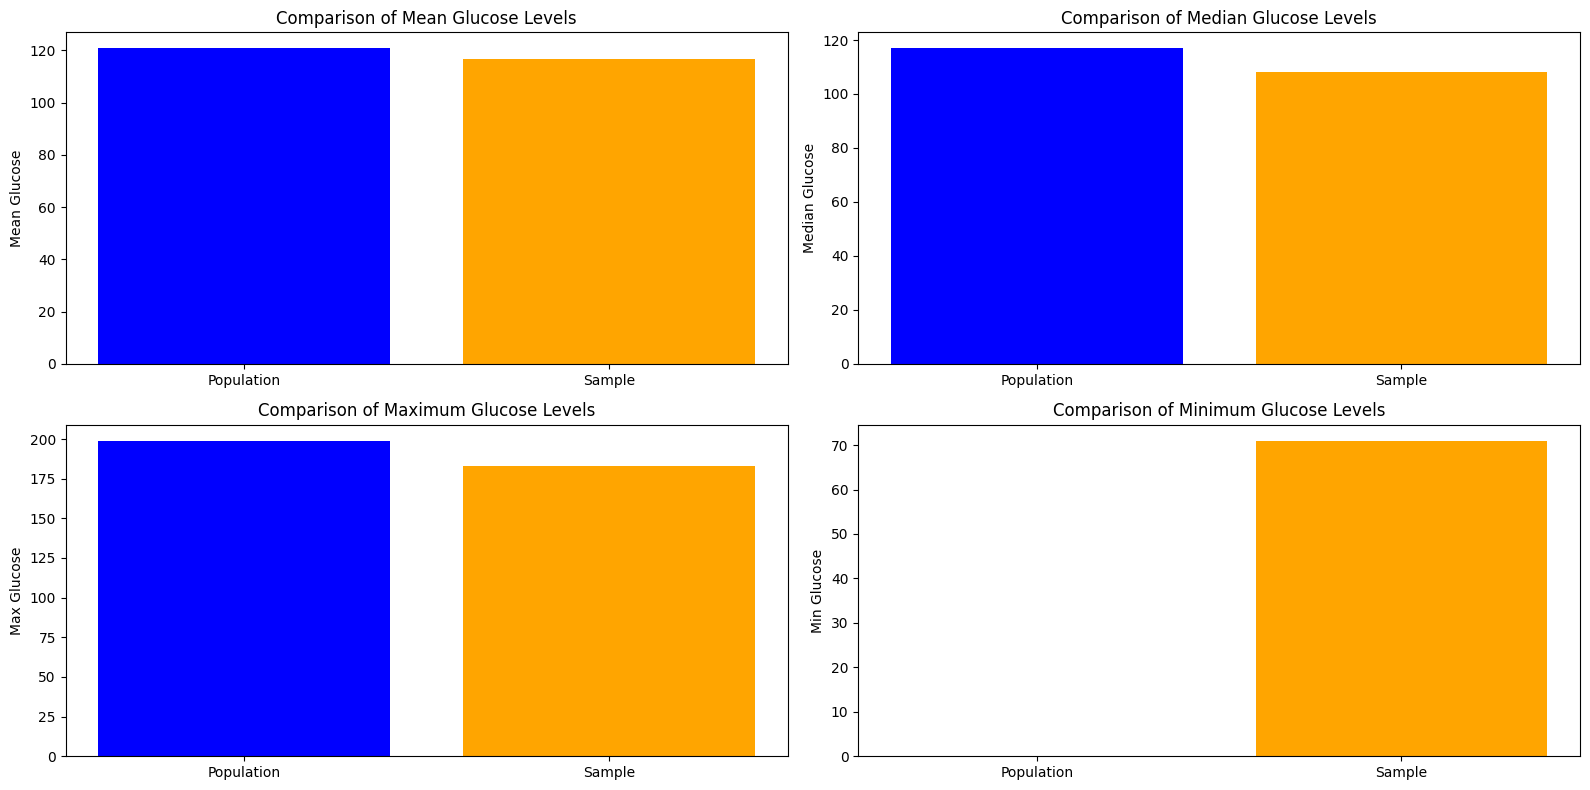

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')


np.random.seed(42)


sample_25 = df.sample(n=25, random_state=42)


pop_glucose_mean = df['Glucose'].mean()
pop_glucose_median = df['Glucose'].median()
pop_glucose_max = df['Glucose'].max()
pop_glucose_min = df['Glucose'].min()


sample_glucose_mean = sample_25['Glucose'].mean()
sample_glucose_median = sample_25['Glucose'].median()
sample_glucose_max = sample_25['Glucose'].max()
sample_glucose_min = sample_25['Glucose'].min()


plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.bar(['Population', 'Sample'], [pop_glucose_mean, sample_glucose_mean], color=['blue', 'orange'])
plt.title('Comparison of Mean Glucose Levels')
plt.ylabel('Mean Glucose')


plt.subplot(2, 2, 2)
plt.bar(['Population', 'Sample'], [pop_glucose_median, sample_glucose_median], color=['blue', 'orange'])
plt.title('Comparison of Median Glucose Levels')
plt.ylabel('Median Glucose')


plt.subplot(2, 2, 3)
plt.bar(['Population', 'Sample'], [pop_glucose_max, sample_glucose_max], color=['blue', 'orange'])
plt.title('Comparison of Maximum Glucose Levels')
plt.ylabel('Max Glucose')


plt.subplot(2, 2, 4)
plt.bar(['Population', 'Sample'], [pop_glucose_min, sample_glucose_min], color=['blue', 'orange'])
plt.title('Comparison of Minimum Glucose Levels')
plt.ylabel('Min Glucose')


plt.tight_layout()
plt.show()


b.Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

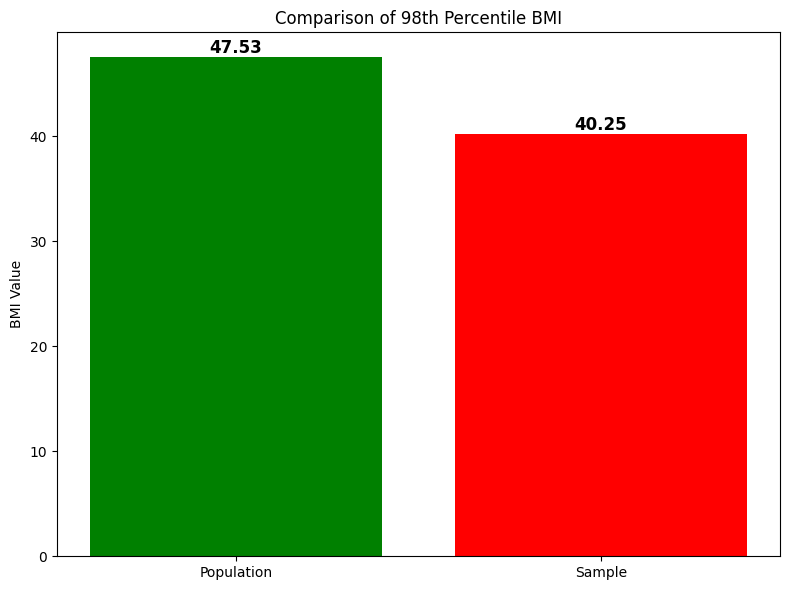

In [2]:
import numpy as np
import matplotlib.pyplot as plt


pop_bmi_98 = np.percentile(df['BMI'], 98)
sample_bmi_98 = np.percentile(sample_25['BMI'], 98)

plt.figure(figsize=(8, 6))


bars = plt.bar(['Population', 'Sample'], [pop_bmi_98, sample_bmi_98], color=['green', 'red'])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Value')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )


plt.tight_layout()
plt.show()


c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

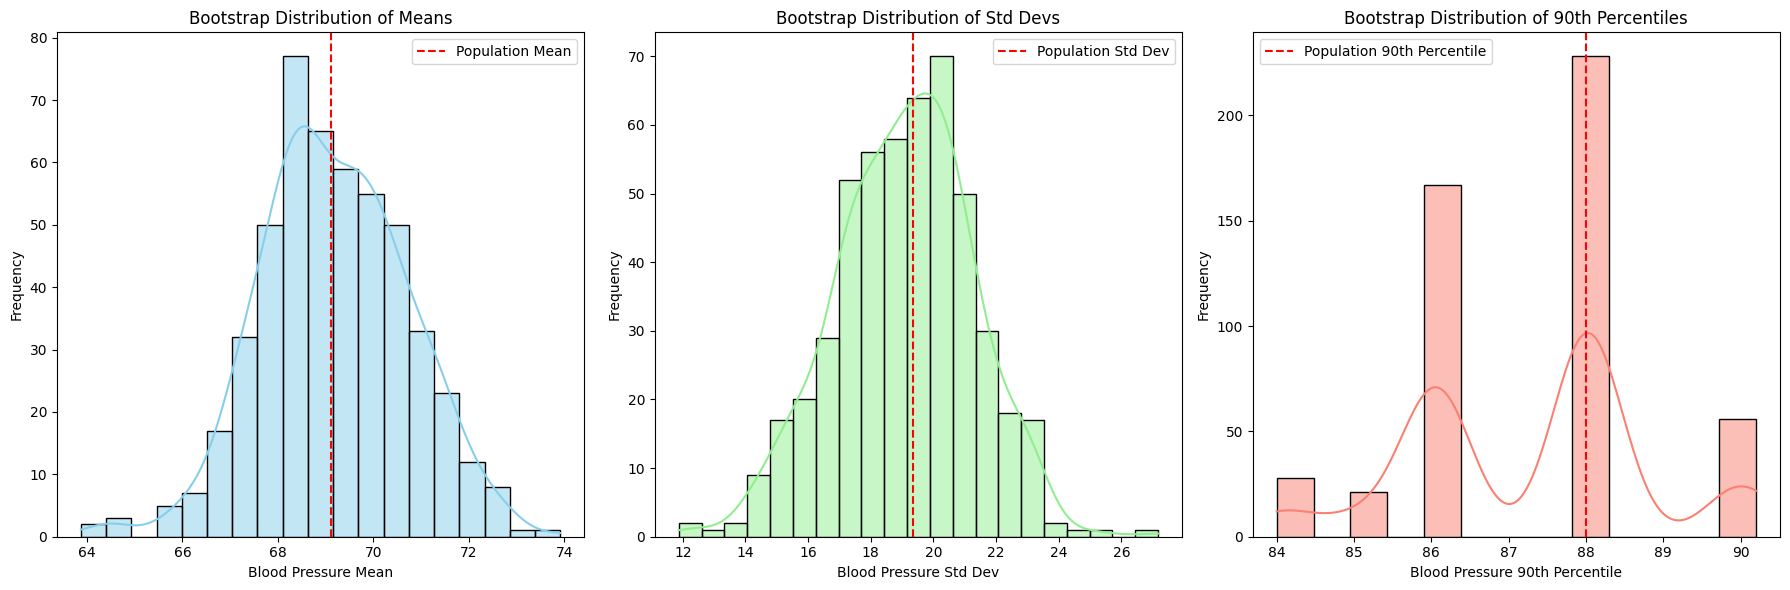

Population Mean: 69.11 | Bootstrap Average Mean: 69.18
Population Std Dev: 19.36 | Bootstrap Average Std Dev: 19.07
Population 90th Percentile: 88.00 | Bootstrap Average 90th Percentile: 87.25


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bootstrap_means = []
bootstrap_stds = []
bootstrap_90th_percentiles = []

for _ in range(500):
    bootstrap_sample = df.sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_90th_percentiles.append(np.percentile(bootstrap_sample['BloodPressure'], 90))

pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std = df['BloodPressure'].std()
pop_bp_90th = np.percentile(df['BloodPressure'], 90)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(bootstrap_means, kde=True, color='skyblue')
plt.axvline(pop_bp_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Bootstrap Distribution of Means')
plt.xlabel('Blood Pressure Mean')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stds, kde=True, color='lightgreen')
plt.axvline(pop_bp_std, color='red', linestyle='--', label='Population Std Dev')
plt.title('Bootstrap Distribution of Std Devs')
plt.xlabel('Blood Pressure Std Dev')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(bootstrap_90th_percentiles, kde=True, color='salmon')
plt.axvline(pop_bp_90th, color='red', linestyle='--', label='Population 90th Percentile')
plt.title('Bootstrap Distribution of 90th Percentiles')
plt.xlabel('Blood Pressure 90th Percentile')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_90th = np.mean(bootstrap_90th_percentiles)

print(f"Population Mean: {pop_bp_mean:.2f} | Bootstrap Average Mean: {avg_bootstrap_mean:.2f}")
print(f"Population Std Dev: {pop_bp_std:.2f} | Bootstrap Average Std Dev: {avg_bootstrap_std:.2f}")
print(f"Population 90th Percentile: {pop_bp_90th:.2f} | Bootstrap Average 90th Percentile: {avg_bootstrap_90th:.2f}")


The Diabetes Data Analysis explores 768 patients with eight attributes and one binary response variable (Outcome). A random sample of 25 observations was taken, comparing the mean and highest Glucose values with the population. The 98th percentile of BMI in the sample and population was also analyzed. Bootstrap analysis (500 samples of 150 observations) was conducted to understand the distribution of Blood Pressure, comparing the average mean, standard deviation, and 90th percentile with population statistics. These findings are visualized and discussed.
